In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

#### Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [2]:
books_data= pd.read_csv('book.csv')
books_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
books_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [4]:
books_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

#### Preparing the data according to the Apriori Algorithm Expectation

**2% Support , 20% confidence**

In [5]:
frequent_item_sets_1 = apriori(df =books_data ,min_support=0.02, use_colnames=True,max_len=6) #Frequent itemsets
frequent_item_sets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(ArtBks, CookBks, ChildBks, RefBks, DoItYBks, ..."
272,0.0270,"(CookBks, GeogBks, ChildBks, RefBks, DoItYBks,..."
273,0.0310,"(ArtBks, CookBks, GeogBks, ChildBks, DoItYBks,..."
274,0.0225,"(ArtBks, CookBks, GeogBks, ChildBks, RefBks, Y..."


In [6]:
rules1=association_rules(df = frequent_item_sets_1 ,metric='confidence',min_threshold=0.20,)

In [7]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
2348,"(ChildBks, DoItYBks, GeogBks)","(ArtBks, RefBks, CookBks)",0.1045,0.0700,0.024,0.229665,3.280930,0.016685,1.207267
2349,"(RefBks, DoItYBks, GeogBks)","(ArtBks, ChildBks, CookBks)",0.0585,0.1265,0.024,0.410256,3.243134,0.016600,1.481152
2350,"(ArtBks, RefBks)","(ChildBks, DoItYBks, CookBks, GeogBks)",0.0895,0.0890,0.024,0.268156,3.012994,0.016035,1.244802
2351,"(RefBks, DoItYBks)","(ArtBks, ChildBks, CookBks, GeogBks)",0.1055,0.0835,0.024,0.227488,2.724409,0.015191,1.186390


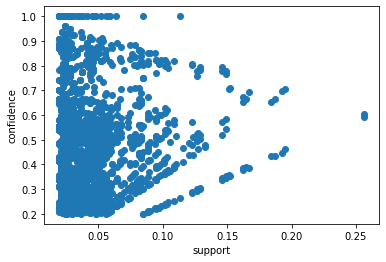

In [8]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**2% Support , 40% confidence**

In [9]:
frequent_item_sets_2 = apriori(df =books_data ,min_support=0.02, use_colnames=True,max_len=6) #Frequent itemsets
frequent_item_sets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(ArtBks, CookBks, ChildBks, RefBks, DoItYBks, ..."
272,0.0270,"(CookBks, GeogBks, ChildBks, RefBks, DoItYBks,..."
273,0.0310,"(ArtBks, CookBks, GeogBks, ChildBks, DoItYBks,..."
274,0.0225,"(ArtBks, CookBks, GeogBks, ChildBks, RefBks, Y..."


In [10]:
rules2=association_rules(df = frequent_item_sets_2 ,metric='confidence',min_threshold=0.40,)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
1371,"(RefBks, DoItYBks, CookBks, GeogBks)","(ArtBks, ChildBks)",0.0495,0.1625,0.024,0.484848,2.983683,0.015956,1.625735
1372,"(RefBks, ChildBks, DoItYBks, GeogBks)","(ArtBks, CookBks)",0.0525,0.1670,0.024,0.457143,2.737382,0.015232,1.534474
1373,"(ArtBks, RefBks, DoItYBks)","(ChildBks, CookBks, GeogBks)",0.0535,0.1495,0.024,0.448598,3.000656,0.016002,1.542432
1374,"(ArtBks, RefBks, GeogBks)","(ChildBks, DoItYBks, CookBks)",0.0565,0.1460,0.024,0.424779,2.909444,0.015751,1.484646


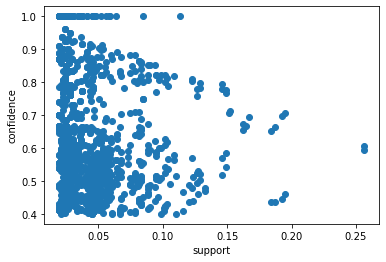

In [11]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**4% Support , 50% confidence**

In [12]:
frequent_item_sets_3 = apriori(df =books_data ,min_support=0.04, use_colnames=True,max_len=5) #Frequent itemsets
frequent_item_sets_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(CookBks, YouthBks, ChildBks, RefBks, GeogBks)"
129,0.0465,"(ArtBks, CookBks, YouthBks, ChildBks, GeogBks)"
130,0.0450,"(CookBks, ChildBks, RefBks, DoItYBks, GeogBks)"
131,0.0535,"(ArtBks, CookBks, ChildBks, DoItYBks, GeogBks)"


In [13]:
rules3=association_rules(df = frequent_item_sets_3 ,metric='confidence',min_threshold=0.50,)

In [14]:
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
367,"(ArtBks, RefBks, ChildBks, GeogBks)",(CookBks),0.0495,0.4310,0.0405,0.818182,1.898334,0.019166,3.129500
368,"(RefBks, ChildBks, CookBks, GeogBks)",(ArtBks),0.0785,0.2410,0.0405,0.515924,2.140762,0.021582,1.567934
369,"(ArtBks, RefBks, CookBks)","(ChildBks, GeogBks)",0.0700,0.1950,0.0405,0.578571,2.967033,0.026850,1.910169
370,"(ArtBks, RefBks, ChildBks)","(CookBks, GeogBks)",0.0760,0.1925,0.0405,0.532895,2.768284,0.025870,1.728732


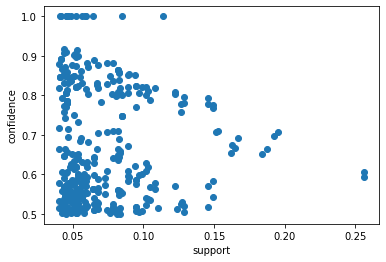

In [15]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**7% Support , 50% confidence**

In [16]:
frequent_item_sets_4 = apriori(df =books_data ,min_support=0.07, use_colnames=True,max_len=4) #Frequent itemsets
frequent_item_sets_4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(RefBks, ChildBks, DoItYBks, CookBks)"
62,0.0820,"(ArtBks, ChildBks, DoItYBks, CookBks)"
63,0.0890,"(ChildBks, DoItYBks, CookBks, GeogBks)"
64,0.0785,"(RefBks, ChildBks, CookBks, GeogBks)"


In [17]:
rules4=association_rules(df = frequent_item_sets_4 ,metric='confidence',min_threshold=0.50,)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
128,"(ArtBks, CookBks, GeogBks)",(ChildBks),0.1035,0.4230,0.0835,0.806763,1.907242,0.039720,2.985975
129,"(ChildBks, CookBks, GeogBks)",(ArtBks),0.1495,0.2410,0.0835,0.558528,2.317545,0.047471,1.719250
130,"(ArtBks, ChildBks)","(CookBks, GeogBks)",0.1625,0.1925,0.0835,0.513846,2.669331,0.052219,1.660997
131,"(ArtBks, CookBks)","(ChildBks, GeogBks)",0.1670,0.1950,0.0835,0.500000,2.564103,0.050935,1.610000


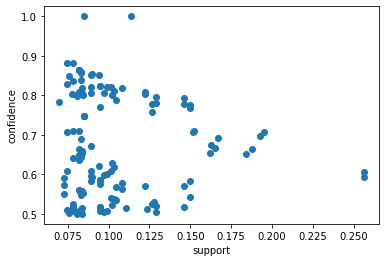

In [18]:
# visualization of obtained rule
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**10% Support , 80% confidence**

In [19]:
frequent_item_sets_5 = apriori(df =books_data ,min_support=0.10, use_colnames=True,max_len=5) #Frequent itemsets
frequent_item_sets_5

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [20]:
rules5=association_rules(df = frequent_item_sets_1 ,metric='confidence',min_threshold=0.90)

In [21]:
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,"(ChildBks, ItalCook)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
4,"(ItalAtlas, ChildBks)",(RefBks),0.0285,0.2145,0.0285,1.000000,4.662005,0.022387,inf
...,...,...,...,...,...,...,...,...,...
115,"(ItalArt, ItalCook, GeogBks)","(ArtBks, CookBks)",0.0240,0.1670,0.0240,1.000000,5.988024,0.019992,inf
116,"(ItalArt, CookBks, GeogBks)","(ArtBks, ItalCook)",0.0250,0.0565,0.0240,0.960000,16.991150,0.022587,23.5875
117,"(CookBks, GeogBks, RefBks, DoItYBks, YouthBks)",(ChildBks),0.0290,0.4230,0.0270,0.931034,2.201027,0.014733,8.3665
118,"(GeogBks, ChildBks, RefBks, DoItYBks, YouthBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.6900


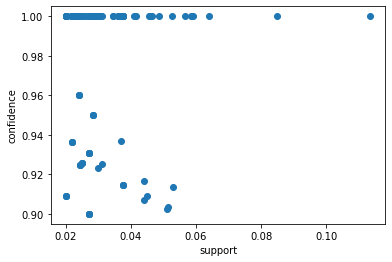

In [22]:
# visualization of obtained rule
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**7% Support , 90% confidence**

In [30]:
frequent_item_sets_6 = apriori(df =books_data ,min_support=0.07, use_colnames=True,max_len=4) #Frequent itemsets
frequent_item_sets_6

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(RefBks, ChildBks, DoItYBks, CookBks)"
62,0.0820,"(ArtBks, ChildBks, DoItYBks, CookBks)"
63,0.0890,"(ChildBks, DoItYBks, CookBks, GeogBks)"
64,0.0785,"(RefBks, ChildBks, CookBks, GeogBks)"


In [31]:
rules6=association_rules(df = frequent_item_sets_6 ,metric='confidence',min_threshold=0.90,)

In [32]:
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf
1,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf


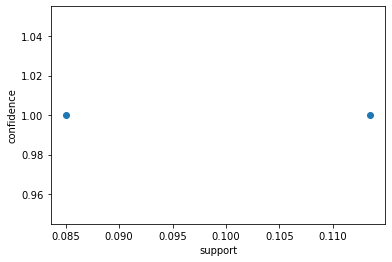

In [26]:
# visualization of obtained rule
plt.scatter(rules6['support'],rules6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [33]:
frequent_item_sets_7 = apriori(df =books_data ,min_support=0.02, use_colnames=True,max_len=2) #Frequent itemsets
frequent_item_sets_7

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.0370,(ItalAtlas)
9,0.0485,(ItalArt)


In [34]:
rules7=association_rules(df = frequent_item_sets_7 ,metric='confidence',min_threshold=0.20,)
rules7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
75,(Florence),(GeogBks),0.1085,0.2760,0.0425,0.391705,1.419221,0.012554,1.190212
76,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
77,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
78,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659


So From Above 7 cases we observed that,
1.	Lower the Confidence level Higher the no. of rules and vice-versa
2.	Higher the Support, lower the no. of rules.
3.  Higher the max length , higher the no.of rules
4.	So, we can conclude that these 3 parameters different combinations can generate different rules.
